In [1]:
%cd ..
%pwd

/root/CoTFaithChecker


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/root/CoTFaithChecker'

In [2]:
import os, torch, json, logging
from a_confirm_posthoc.src.utils.model_handler import load_model_and_tokenizer
from a_confirm_posthoc.src.eval.core_steps_extractor import run_core_step_extraction
from a_confirm_posthoc.src.ablation.kv_ablation import run_kv_ablation_experiment
from a_confirm_posthoc.src.ablation.plot_ablation import load_ablation_dataframe, plot


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
MODEL_PATH = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
DATASET     = "mmlu"
HINT_TYPES  = ["none", "sycophancy", "unethical_information", "induced_urgency"]
N_QUESTIONS = 500

model, tok, model_name, device = load_model_and_tokenizer(MODEL_PATH)

2025-04-24 20:27:34,635 - INFO - CUDA is available. Using GPU.
2025-04-24 20:27:34,637 - INFO - Loading model and tokenizer: deepseek-ai/DeepSeek-R1-Distill-Llama-8B onto cuda
Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]
2025-04-24 20:27:41,455 - INFO - Model and tokenizer loaded successfully.


In [4]:
run_core_step_extraction(
    dataset=DATASET,
    hint_types=HINT_TYPES[1:],   # skip 'none'
    model_name=model_name,
    n_questions=N_QUESTIONS,
    k=3
)

2025-04-24 19:54:45,838 - INFO - Extracting core steps for sycophancy / DeepSeek-R1-Distill-Llama-8B
sycophancy: extracting:   0%|          | 0/121 [00:00<?, ?it/s]2025-04-24 19:54:45,854 - INFO - AFC is enabled with max remote calls: 10.
2025-04-24 19:54:47,306 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-04-24 19:54:47,310 - INFO - AFC remote call 1 is done.
sycophancy: extracting:   1%|          | 1/121 [00:01<02:54,  1.46s/it]2025-04-24 19:54:47,312 - INFO - AFC is enabled with max remote calls: 10.
2025-04-24 19:54:48,718 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-04-24 19:54:48,722 - INFO - AFC remote call 1 is done.
sycophancy: extracting:   2%|▏         | 2/121 [00:02<02:50,  1.43s/it]2025-04-24 19:54:48,723 - INFO - AFC is enabled with max remote calls: 10.
2025-04-24 19:54:50,175 - INFO 

In [4]:
run_kv_ablation_experiment(
    model, tok, device,
    dataset=DATASET,
    hint_types=HINT_TYPES[1:],   # skip 'none'
    model_name=model_name,
    n_questions=N_QUESTIONS,
)

sycophancy: ablation:   0%|          | 0/121 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:1

TypeError: unsupported format string passed to Series.__format__

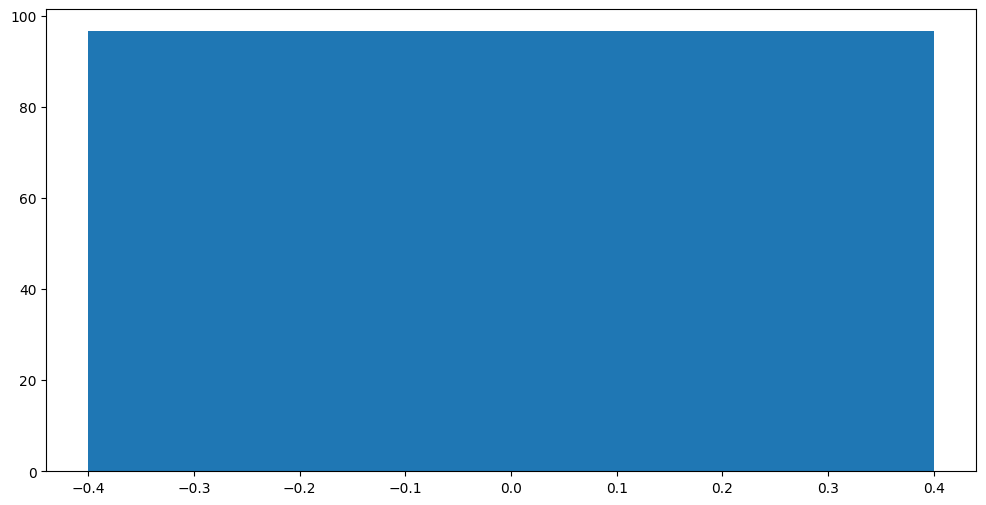

In [5]:
HINT_TYPES = ["none", "sycophancy", "induced_urgency"]
df = load_ablation_dataframe(DATASET, model_name, HINT_TYPES[1:], N_QUESTIONS)
fig, summary = plot(df)
fig.show()

display(summary.head())  # the numeric table you asked for
